In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

Встановлюємо максимальні розміри для виводу pandas:

In [2]:
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns", 1000)

Первинний аналіз даних.

In [3]:
train_ds = pd.read_csv('application_train.csv', sep=',')
test_ds = pd.read_csv('application_test.csv', sep=',')
print("----- train data info -----")
train_ds.info()
print("shape: " + str(train_ds.shape))
print("----- test data info ------")
test_ds.info()
print("shape: " + str(test_ds.shape))

----- train data info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
shape: (307511, 122)
----- test data info ------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
shape: (48744, 121)


Бачимо, що в тестовому наборі на одну колонку менше. Очевидно, це саме та колонка, яку необхідно буде прогнозувати. Колонка має назву 'TARGET' та повинна містити результат передбачення моделі.

In [4]:
train_ds.columns.difference(test_ds.columns)

Index(['TARGET'], dtype='object')

Статистичні дані тренувального датасету:

In [5]:
train_ds.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

Виведемо п'ять рядків датасету, щоб отримати загальні уявлення про дані:

In [6]:
train_ds.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
59056,168452,0,Cash loans,F,N,N,2,90000.0,814041.0,28840.5,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.015221,-14349,-812,-6479.0,-1153,NaN,1,1,1,1,0,0,High skill tech staff,4.0,2,2,SATURDAY,15,0,0,0,0,0,0,Industry: type 12,NaN,0.609692,NaN,0.1113,NaN,0.9911,NaN,NaN,0.12,0.1034,0.3333,NaN,0.0965,NaN,0.1139,NaN,NaN,0.1134,NaN,0.9911,NaN,NaN,0.1208,0.1034,0.3333,NaN,0.0987,NaN,0.1187,NaN,NaN,0.1124,NaN,0.9911,NaN,NaN,0.12,0.1034,0.3333,NaN,0.0982,NaN,0.1160,NaN,NaN,NaN,block of flats,0.0896,Panel,No,2.0,0.0,2.0,0.0,-484.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
112266,230236,0,Cash loans,F,N,Y,0,382500.0,1258650.0,52074.0,1125000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008019,-21333,-1056,-1649.0,-4263,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,MONDAY,11,0,0,0,0,0,0,Business Entity Type 3,NaN,0.544092,0.391055,0.0649,0.0573,0.9717,0.6124,0.012,0.00,0.1724,0.1250,0.0417,0.0338,0.053,0.0822,0.0154,0.1766,0.0662,0.0594,0.9717,0.6276,0.0121,0.0000,0.1724,0.1250,0.0417,0.0346,0.0579,0.0856,0.0156,0.187,0.0656,0.0573,0.9717,0.6176,0.0121,0.00,0.1724,0.1250,0.0417,0.0344,0.0539,0.0837,0.0155,0.1803,reg oper account,block of flats,0.1199,"Stone, brick",No,0.0,0.0,0.0,0.0,-2282.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
129995,250776,0,Cash loans,F,N,Y,1,202500.0,508495.5,24592.5,454500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009657,-18753,-10393,-1650.0,-2046,NaN,1,1,0,1,0,0,Laborers,3.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Telecom,0.297204,0.598942,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Очевидно, що деякі значення, наприклад, колонки DAYS_BIRTH, DAYS_EMPLOYED та DAYS_REGISTRATION повинні бути відносними даними.

Дослідимо типи даних у датасеті:

In [7]:
train_ds.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


Знайдемо кореляцію вхідних даних з вихідною колонкою, яку необхідно передбачити, щоб знайти найбільш вагомі вхідні колонки:

In [8]:
abs_cors = abs(train_ds.corr()['TARGET']).sort_values(ascending=False)
print(abs_cors)

TARGET                          1.000000
EXT_SOURCE_3                    0.178919
EXT_SOURCE_2                    0.160472
EXT_SOURCE_1                    0.155317
DAYS_BIRTH                      0.078239
REGION_RATING_CLIENT_W_CITY     0.060893
REGION_RATING_CLIENT            0.058899
DAYS_LAST_PHONE_CHANGE          0.055218
DAYS_ID_PUBLISH                 0.051457
REG_CITY_NOT_WORK_CITY          0.050994
FLAG_EMP_PHONE                  0.045982
DAYS_EMPLOYED                   0.044932
REG_CITY_NOT_LIVE_CITY          0.044395
FLAG_DOCUMENT_3                 0.044346
FLOORSMAX_AVG                   0.044003
FLOORSMAX_MEDI                  0.043768
FLOORSMAX_MODE                  0.043226
DAYS_REGISTRATION               0.041975
AMT_GOODS_PRICE                 0.039645
OWN_CAR_AGE                     0.037612
REGION_POPULATION_RELATIVE      0.037227
ELEVATORS_AVG                   0.034199
ELEVATORS_MEDI                  0.033863
FLOORSMIN_AVG                   0.033614
FLOORSMIN_MEDI  

Знайдемо відсоток відсутніх даних по колонкам у тренувальному наборі, щоб встановити цілісність набору:

In [9]:
null_rows = train_ds.isnull()
percent_missed = (null_rows.sum() / null_rows.count()*100).sort_values(ascending=False)
null_data_table = pd.concat([percent_missed], axis=1,keys=["Empty rows, %"])
print(null_data_table)

                              Empty rows, %
COMMONAREA_MEDI                   69.872297
COMMONAREA_AVG                    69.872297
COMMONAREA_MODE                   69.872297
NONLIVINGAPARTMENTS_MODE          69.432963
NONLIVINGAPARTMENTS_AVG           69.432963
NONLIVINGAPARTMENTS_MEDI          69.432963
FONDKAPREMONT_MODE                68.386172
LIVINGAPARTMENTS_MODE             68.354953
LIVINGAPARTMENTS_AVG              68.354953
LIVINGAPARTMENTS_MEDI             68.354953
FLOORSMIN_AVG                     67.848630
FLOORSMIN_MODE                    67.848630
FLOORSMIN_MEDI                    67.848630
YEARS_BUILD_MEDI                  66.497784
YEARS_BUILD_MODE                  66.497784
YEARS_BUILD_AVG                   66.497784
OWN_CAR_AGE                       65.990810
LANDAREA_MEDI                     59.376738
LANDAREA_MODE                     59.376738
LANDAREA_AVG                      59.376738
BASEMENTAREA_MEDI                 58.515956
BASEMENTAREA_AVG                

Бачимо, що дані часткові.

Exploratory Data Analysis.

Побудуємо розподіл змінної TARGET у тренувальному датасеті:

<Figure size 1152x648 with 0 Axes>

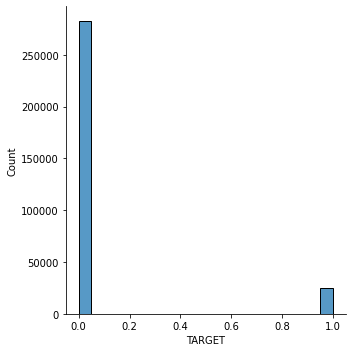

In [10]:
plt.figure(figsize = (16, 9))
sns.displot(train_ds.TARGET)

Чисельні значення:

In [11]:
train_ds.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Знайдемо відсоток клієнтів, які мали проблеми з поверненням боргу (TARGET = 1):

In [12]:
train_ds.TARGET.value_counts(1)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

Бачимо, що 8.072% клієнтів мають проблеми з поверненням кредиту.

Кодування категоріальних змінних:

In [13]:
train_ds.select_dtypes(include=[object]).apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Всього маємо 16 категоріальних ознак. Label encoding застосовувати не варто, оскільки тут маємо досить широку різницю у варіативності (від 2 до 58) по ознакам. Алгоритм може визначити, що ознака ORGANIZATION_TYPE важливіша через те, що в неї багато значень. Тому будемо використовувати One-hot encoding, при якому ознака розкладається на декілька за кількістю категорій.

In [14]:
train_ds = pd.get_dummies(train_ds,drop_first=True)
test_ds = pd.get_dummies(test_ds,drop_first=True)
print('Train dataset shape: ', train_ds.shape)
print('Test dataset shape: ', test_ds.shape)

Train dataset shape:  (307511, 230)
Test dataset shape:  (48744, 226)


In [15]:
target = train_ds['TARGET']
train_ds, test_ds = train_ds.align(test_ds, join = 'inner', axis = 1)
print('Train dataset shape: ', train_ds.shape)
print('Test dataset shape: ', test_ds.shape)
train_ds['TARGET'] = target
print('Train dataset shape: ', train_ds.shape)
print('Test dataset shape: ', test_ds.shape)

Train dataset shape:  (307511, 226)
Test dataset shape:  (48744, 226)
Train dataset shape:  (307511, 227)
Test dataset shape:  (48744, 226)


Розглянемо аномалію у DAYS_EMPLOYED:

In [16]:
train_ds['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Бачимо, що найбільшим значенням є 365243 дні, що становить трохи більше 1000 років, та мінімальне значення, що є від'ємним. Таким чином, видно, що показник є відносним та показує час з останньої позики. Розглянемо розподіл даних з такою ознакою на графіку:

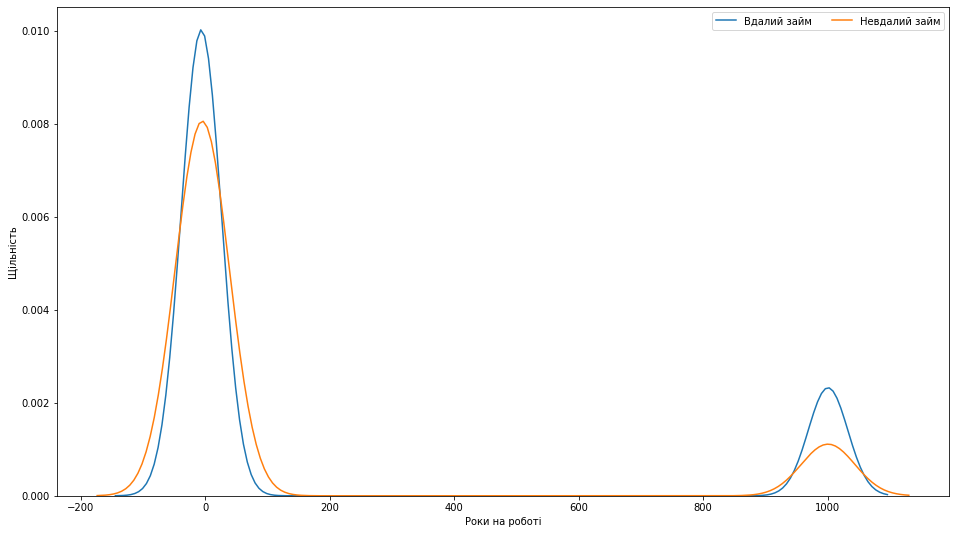

In [17]:
plt.figure(figsize=(16,9))
sns.kdeplot(train_ds.loc[train_ds['TARGET'] == 0, 'DAYS_EMPLOYED'] / 365)
sns.kdeplot(train_ds.loc[train_ds['TARGET'] == 1, 'DAYS_EMPLOYED'] / 365)
plt.xlabel('Роки на роботі')
plt.ylabel('Щільність')
plt.legend(['Вдалий займ', 'Невдалий займ'], ncol=2, loc='upper right')

Бачимо, що аномалії починаються від 900 років. Знайдемо їх кількість та побудуємо гістограму вдалості виплат для таких клієнтів:

Anomalies length: 55374
Success rate among anomalies,%: 94.6003539567306


<AxesSubplot:xlabel='TARGET', ylabel='count'>

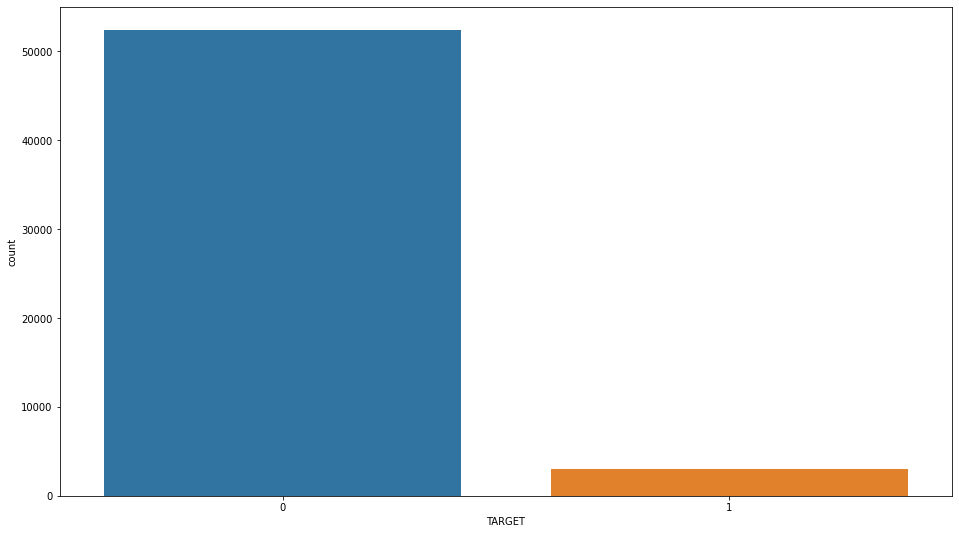

In [18]:
anomalies = train_ds[(train_ds['DAYS_EMPLOYED']/365>=900)]
successfull_anomalies = len(anomalies[anomalies['TARGET'] == 0])
failed_anomalies = len(anomalies[anomalies['TARGET'] == 1])
print("Anomalies length: " + str(len(anomalies)))
print("Success rate among anomalies,%: " + str(successfull_anomalies/(successfull_anomalies + failed_anomalies)*100) )
plt.figure(figsize = (16, 9))
sns.countplot(x='TARGET',data=anomalies)

Бачимо, що відсоток вдалих займів становить 94.6, тому можемо включати "аномальних" клієнтів до загальної таблиці.

Корелляція даних.

Знайдемо коефіцієнти корелляції Пірсона відносно змінної TARGET:

In [19]:
correlations = train_ds.corr()['TARGET'].sort_values()
print('Highest positive corellation:\n')
print(correlations.tail(40))
print('\nLowest negative corellation: \n')
print(correlations.head(10))

Highest positive corellation:

OBS_60_CNT_SOCIAL_CIRCLE                             0.009022
OBS_30_CNT_SOCIAL_CIRCLE                             0.009131
CNT_FAM_MEMBERS                                      0.009308
ORGANIZATION_TYPE_Industry: type 3                   0.009691
ORGANIZATION_TYPE_Restaurant                         0.010266
NAME_EDUCATION_TYPE_Lower secondary                  0.011747
OCCUPATION_TYPE_Cooking staff                        0.012222
OCCUPATION_TYPE_Security staff                       0.014648
ORGANIZATION_TYPE_Transport: type 3                  0.017552
CNT_CHILDREN                                         0.019187
OCCUPATION_TYPE_Sales staff                          0.019537
NAME_HOUSING_TYPE_Rented apartment                   0.019767
ORGANIZATION_TYPE_Construction                       0.019792
AMT_REQ_CREDIT_BUREAU_YEAR                           0.019930
ORGANIZATION_TYPE_Business Entity Type 3             0.023993
NAME_FAMILY_STATUS_Single / not married

Ознаки з найбільшими кореляціями:
EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1, DAYS_EMPLOYED, NAME_INCOME_TYPE, DAYS_BIRTH, REGION_RATING_CLIENT_W_CITY.

Дослідимо кореляцію цих даних.

Розподіл за віком:

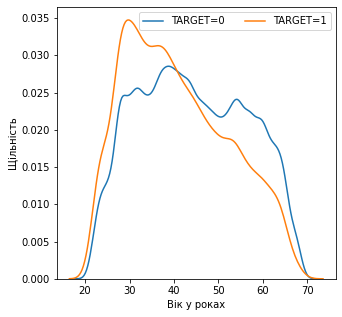

In [20]:
train_ds['DAYS_BIRTH'] = abs(train_ds['DAYS_BIRTH'])
train_ds['DAYS_BIRTH'].corr(train_ds['TARGET'])
plt.figure(figsize = (5, 5))
sns.kdeplot(train_ds.loc[train_ds['TARGET'] == 0, 'DAYS_BIRTH'] / 365)
sns.kdeplot(train_ds.loc[train_ds['TARGET'] == 1, 'DAYS_BIRTH'] / 365)

plt.xlabel('Вік у роках'); plt.ylabel('Щільність');
plt.legend(['TARGET=0', 'TARGET=1'], ncol=2, loc='upper right')

Бачимо, що для людей віком від 20 до 30 років відсоток неповернень більший та різко знижується від 60 до 70.

Розподіл за ознаками EXT_SOURCE_1-EXT_SOURCE_3:

In [21]:
external_features = train_ds[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
print(external_features.corr())

                TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
TARGET        1.000000     -0.155317     -0.160472     -0.178919
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000


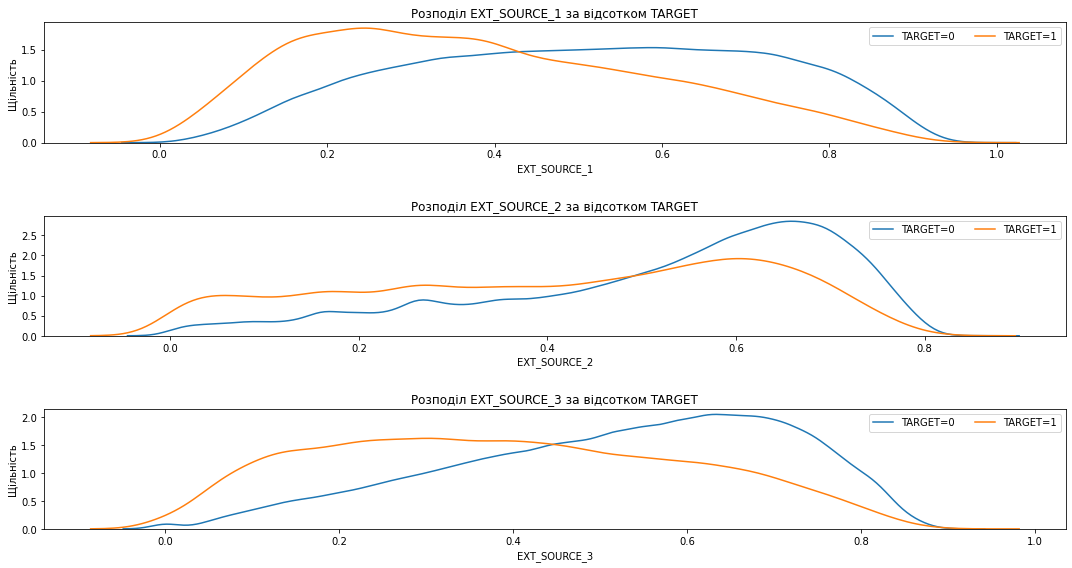

In [22]:
plt.figure(figsize = (15, 8))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(train_ds.loc[train_ds['TARGET'] == 0, source], label = 'TARGET == 0')
    sns.kdeplot(train_ds.loc[train_ds['TARGET'] == 1, source], label = 'TARGET == 1')
    
    plt.title(f'Розподіл {source} за відсотком TARGET')
    plt.xlabel('%s' % source); plt.ylabel('Щільність');
    plt.legend(['TARGET=0', 'TARGET=1'], ncol=2, loc='upper right')
    
plt.tight_layout(h_pad = 2.5)

Бачимо, що у другій половині значень зовнішніх параметрів (>0.5) ймовірність повернення боргу підвищується.

Будуємо датасет для моделі, обравши ті дані, які найбільш сильно корелюють з TARGET та найбільш присутні у вихідному датасеті. 

In [23]:
data_test = pd.read_csv("application_test.csv")
data_train = pd.read_csv("application_train.csv")

features = [
    "TARGET",
    "CODE_GENDER",
    "NAME_CONTRACT_TYPE",
    "FLAG_OWN_CAR",
    "CNT_CHILDREN",
    "FLAG_OWN_REALTY", 
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "EXT_SOURCE_3", 
    "EXT_SOURCE_2",
    "EXT_SOURCE_1",
    "DAYS_EMPLOYED",
    "DAYS_BIRTH",
    "NAME_EDUCATION_TYPE",
    "NAME_INCOME_TYPE", 
    "AMT_GOODS_PRICE",
    "REGION_RATING_CLIENT",
    "FLAG_OWN_CAR"
    
 ]

selected_train_data = data_train[features]
features.remove("TARGET")
selected_test_data = data_test[features]

In [24]:
num_features = ["AMT_INCOME_TOTAL","AMT_CREDIT", "EXT_SOURCE_3","EXT_SOURCE_2","EXT_SOURCE_1", "DAYS_BIRTH"]
cat_features = ["CODE_GENDER", "NAME_CONTRACT_TYPE","FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_EDUCATION_TYPE","NAME_INCOME_TYPE"]

Обчислимо кількість пропущених значень у рядках та відсоток таких значень:

In [25]:
nulled_test_values = selected_test_data.isnull()
missed_count = nulled_test_values.sum().sort_values(ascending=False)
missed_percent = (nulled_test_values.sum() / nulled_test_values.count() * 100).sort_values(ascending=False)
print(pd.concat([missed_count, missed_percent], axis=1,
                                      keys=['Кількість пропущених', 'Відсоток пропущених']))


                      Кількість пропущених  Відсоток пропущених
EXT_SOURCE_1                         20532            42.122107
EXT_SOURCE_3                          8668            17.782701
EXT_SOURCE_2                             8             0.016412
REGION_RATING_CLIENT                     0             0.000000
AMT_GOODS_PRICE                          0             0.000000
NAME_INCOME_TYPE                         0             0.000000
NAME_EDUCATION_TYPE                      0             0.000000
DAYS_BIRTH                               0             0.000000
DAYS_EMPLOYED                            0             0.000000
CODE_GENDER                              0             0.000000
NAME_CONTRACT_TYPE                       0             0.000000
AMT_CREDIT                               0             0.000000
AMT_INCOME_TOTAL                         0             0.000000
FLAG_OWN_REALTY                          0             0.000000
CNT_CHILDREN                            

In [26]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

numerical_transformer = Pipeline(
        steps = [
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]
)

categorial_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

column_transformer = ColumnTransformer(
     transformers = [
         ('numerical', numerical_transformer, num_features),
         ('categorical', categorial_transformer, cat_features)
     ]
)

In [27]:
Q1 = data_test.quantile(0.25)
Q3 = data_test.quantile(0.75)
IQR = Q3-Q1

data_train_dirty = data_train[num_features + cat_features + ["TARGET"]]
data_train_clean = data_train_dirty[~((data_train_dirty < (Q1 - 1.5 * IQR)) |
                                    (data_train_dirty > (Q3 + 1.5 * IQR))).any(axis=1)]

column_transformer.fit(data_train_clean.drop("TARGET",axis=1))

train_x = column_transformer.transform(data_train_clean.drop("TARGET",axis=1))
test_x = column_transformer.transform(data_test[num_features + cat_features])

train_y = data_train_clean["TARGET"]

print('train_x:', train_x.shape)
print('train_y:', train_y.shape)
print('test_x:', test_x.shape)

train_x: (279253, 28)
train_y: (279253,)
test_x: (48744, 28)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [29]:
train_split_x, validate_x, train_split_y, validate_y = train_test_split(train_x, train_y, test_size=0.2)
print(f"Train: {train_split_x.shape}, {train_split_y.shape}")
print(f"Validation: {validate_x.shape}, {validate_y.shape}")

Train: (223402, 28), (223402,)
Validation: (55851, 28), (55851,)


Логістична регресія:

In [30]:
ROUNDS = 2
for i in range(1,ROUNDS + 1):
  print(f"ROUND {i} [tol={1/(i*100)}] ")
  lr = LogisticRegression(class_weight="balanced", tol = 1/(i*100), max_iter=1000)
  lr.fit(train_split_x, train_split_y)
  train_preds = lr.predict(train_split_x)
  print(f"Train ROC_AUC: {roc_auc_score(train_split_y, train_preds)}")
  test_preds = lr.predict(validate_x)
  print(f"Validation ROC_AUC: {roc_auc_score(validate_y, test_preds)}")

ROUND 1 [tol=0.01] 
Train ROC_AUC: 0.6680629860320093
Validation ROC_AUC: 0.6674932318607787
ROUND 2 [tol=0.005] 
Train ROC_AUC: 0.6680629860320093
Validation ROC_AUC: 0.6674932318607787


Обчислення метрики для логістичної регресії:

In [31]:
clr = LogisticRegression(class_weight="balanced", max_iter=1000,tol=0.01)
clr.fit(train_split_x, train_split_y)

train_preds = clr.predict(train_split_x)
print(f"Training ROC_AUC: {roc_auc_score(train_split_y, train_preds)}")
test_preds = clr.predict(validate_x)
print(f"Validation ROC_AUC: {roc_auc_score(validate_y, test_preds)}")

Training ROC_AUC: 0.6680629860320093
Validation ROC_AUC: 0.6674932318607787


In [32]:
probs = clr.predict_proba(test_x)

In [33]:
pd.DataFrame({
    "SK_ID_CURR": data_test["SK_ID_CURR"],
    "TARGET": [pr[1] for pr in probs]
}).to_csv("./my_results.csv",index=False)

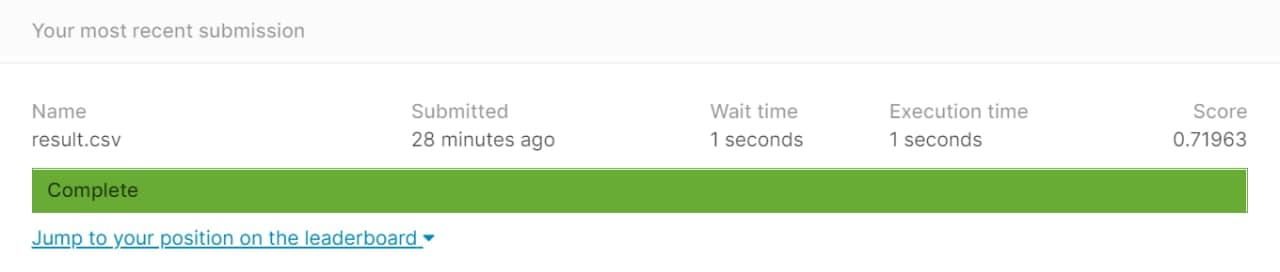

In [35]:
# Результати на змаганні в Кaggle:
from IPython import display
display.Image("./1.jpg")